In [63]:
import plotly.graph_objects as go
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#data = pd.read_csv("C:/Users/ESTEBAN/Documents/Scripts_U/git/scripts/Data/FCD/limpia.csv", sep = ",")
# data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/limpia.csv",sep=",") 
data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/Data_limpio.csv",sep=",")

In [64]:
##Limpieza 

#Identificamos cuartiles y mediana
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df

data['Medal'] = data['Medal'].replace(np.nan,'No Medal')
data['IMC'] = (data['Weight']/((data['Height']/100)*(data['Height']/100)))
data = data.dropna()
data = data.drop(data[data['IMC']<18.5].index)
data
# data.to_csv("Data_limpio.csv")

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IMC
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,24.691358
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,20.761246
2,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,23.959094
3,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,23.959094
4,6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,23.959094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198075,271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,27.776911
198076,271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,19.047004
198077,271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,19.047004
198078,271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,28.049671


In [65]:
bins =[i for i in range(10,95,5)]
bins

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

In [66]:
edad = data["Age"]
print("Promedio de edad limpia:", data["Age"].mean())

Promedio de edad limpia: 25.19551191437803


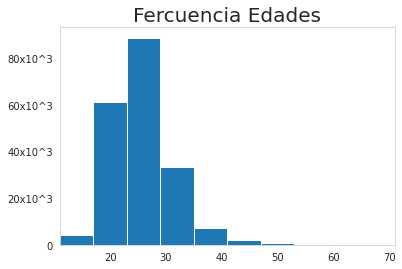

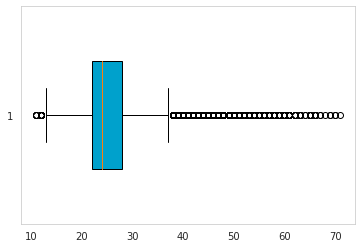

In [67]:
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))+"x10^3"

plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)

f = plt.figure(1)
plt.hist(edad)
plt.title("Fercuencia Edades", fontsize = 20)
plt.grid(alpha=0.5)

g = plt.figure(2)
plt.boxplot(edad, vert = False,
            widths = 0.5, patch_artist = True, 
            boxprops = dict(color="black", facecolor = "#00a1cc"))

plt.grid(alpha=1)
plt.show()

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

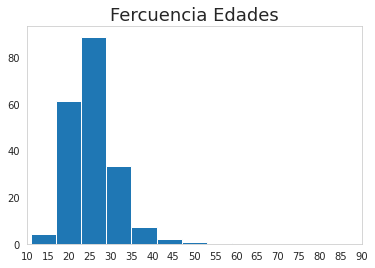

In [68]:
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))

plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)

f = plt.figure(1)
plt.hist(edad)
plt.xticks(bins)
plt.title("Fercuencia Edades", fontsize = 18)
plt.grid(alpha=0.5)
bins

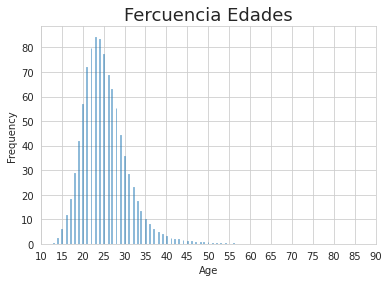

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))
edad = data["Age"]
plt.xlim(min(edad),max(edad))
plt.gca().yaxis.set_major_formatter(lblFormat)
sns.set_style("whitegrid")
sns_plot = sns.histplot(data = data, x = "Age", stat="frequency", fill = False)
plt.xticks(bins)
plt.title("Fercuencia Edades", fontsize = 18)
plt.show()

fig = sns_plot.get_figure()
fig.savefig("output.png")

In [70]:
lista = []
for a in sucio["Age"]:
    if not pd.isna(a):
        if int(a) > 18 & int(a) < 60:
            lista.append(a)

df = pd.cut( lista, bins = bins)
print(df.value_counts())


(10, 15]      3279
(15, 20]     32277
(20, 25]    103280
(25, 30]     68694
(30, 35]     25723
(35, 40]      8683
(40, 45]      3879
(45, 50]      1884
(50, 55]       909
(55, 60]       459
(60, 65]       300
(65, 70]       169
(70, 75]        81
(75, 80]        12
(80, 85]         3
(85, 90]         3
dtype: int64


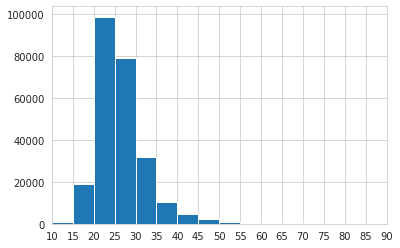

In [71]:
df = data[["Age","Height"]]
edades = pd.DataFrame( data = {'Age': lista} )

plt.hist(edades, bins = bins )
plt.xlim(18,40)
plt.xticks(bins)
plt.show()

In [72]:
for i in range(18,66,6):
    print(i,",",end="")

18 ,24 ,30 ,36 ,42 ,48 ,54 ,60 ,

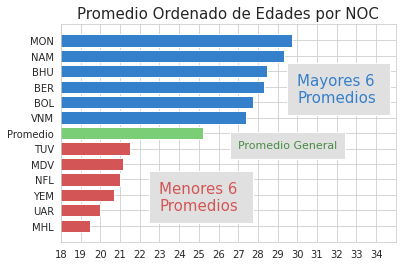

In [196]:
def prnt(df,data):
    for a in list(df.index):
        print("Deporte: ",a)
        print("Promedio: ",data[data["NOC"] == a]["Age"].mean() ,"\n")
    return 0

#Compar edad con deporte con promedio de todas las edades
df = pd.DataFrame(data["NOC"].value_counts())
nombres = []
mean = []

for a in list(df.index):
    # print("Deporte: ",a)
    # print("Promedio: ",data[data["NOC"] == a]["Age"].mean() ,"\n")
    nombres.append(a)
    mean.append(data[data["NOC"] == a]["Age"].mean())

dframe = pd.DataFrame(mean,nombres)
dframe.columns = ["Promedio Edades"]
dframe.sort_values(by = "Promedio Edades", inplace=True, ascending=True)

dfmean = pd.DataFrame([data["Age"].mean()],columns=["Promedio Edades"],index=["Promedio"])
dframe = pd.concat([dframe.head(6),dfmean,dframe.tail(6)])
c1 = '#d45555'
c2 = '#3580ca'
c3 = '#7acf76'
color = []
for i in range(6): color.append(c1)
color.append(c3)
for i in range(6): color.append(c2)
plt.barh(list(dframe.index),dframe["Promedio Edades"],color = color)
plt.xticks([x for x in range(10,35)])

plt.xlim([18,35])
plt.title("Promedio Ordenado de Edades por NOC", fontsize = 15)
plt.text(30,8, 'Mayores 6 \nPromedios', fontsize=15, color=c2, bbox ={'facecolor':'#e0e0e0', 'pad':10})
plt.text(23,1, 'Menores 6 \nPromedios', fontsize=15, color=c1, bbox ={'facecolor':'#e0e0e0', 'pad':10})
plt.text(27,5, 'Promedio General', fontsize=11, color="#488c45", bbox ={'facecolor':'#e0e0e0', 'pad':8})
plt.show()
# prnt(dframe,data)


In [182]:
f = pd.DataFrame([data["Age"].mean()],index=["Promedio"], columns=["Promedio Edades"])
f

,Promedio Edades
Promedio,25.195512


In [213]:
# data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/Data_limpio.csv",sep=",")
data = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/datap1.csv",sep=",")
eval = "Name"

#Compar edad con deporte con promedio de todas las edades
df = pd.DataFrame(data[eval].value_counts())

nombres = ["Andreas Wecker", "Jean Lucien Nicolas Jacoby", "Takashi Ono", "Joseph \"Josy\" Stoffel", "Heikki Ilmari Savolainen", "Robert Tait McKenzie"]
Ages = []

for a in nombres:
    # print(eval,": ",a)
    # print("Promedio: ",data[data[eval] == a]["Age"].mean() ,"\n")
    Ages.append(data[data[eval] == a]["Age"].mean())                                                    

dframe = pd.DataFrame(Ages,nombres)
dframe.columns = ["Promedio Edades"]
dframe.sort_values(by = "Promedio Edades", inplace=True, ascending=False)
dframe

,Promedio Edades
Robert Tait McKenzie,64.655172
Jean Lucien Nicolas Jacoby,42.125000
Heikki Ilmari Savolainen,31.487179
"Joseph ""Josy"" Stoffel",27.789474
Takashi Ono,26.787879
Andreas Wecker,24.000000


In [74]:
df = pd.DataFrame(data["NOC"].value_counts())

nombres = []
mean = []

for a in list(df.index):
    # print("Deporte: ",a)
    # print("Promedio: ",data[data["Sport"] == a]["Age"].mean() ,"\n")
    nombres.append(a)
    mean.append(data[data["NOC"] == a]["Age"].mean())

dframe = pd.DataFrame(mean,nombres).dropna()
dframe

,0
USA,25.218859
CAN,24.983024
FRA,25.519436
GBR,25.503175
ITA,25.621778
...,...
SSD,24.000000
SAA,21.666667
YMD,24.000000
UAR,20.000000


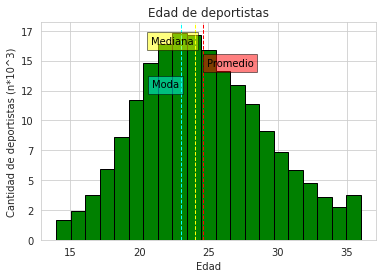

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import csv
df5 = pd.read_csv("/home/_init_/Documentos/Scripts/GIT/scripts/Data/FCD/datap1.csv",sep=",") 


#Identificamos cuartiles y mediana
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df

#Funcion para cambiar el formato del eje y
def lblFormat(n, pos):
    if (n==0):
        return str(int(n*10))
    elif (n!=0):
        return str((int(n / 1e3)))

df5['Medal'] = df5['Medal'].replace(np.nan,'No Medal')
df5 = df5.dropna()
df5['IMC'] = (df5['Weight']/((df5['Height']/100)*(df5['Height']/100)))
df5 = df5.drop(df5[df5['IMC']<18.5].index)
df5height = remove_outlier(df5,'Age') 

plt.hist(df5height['Age'],21, color="green", ec= "black")

ax = plt.subplot()
plt.axvline(df5height["Age"].median(), color='yellow', linestyle='--', linewidth=1)
plt.axvline(df5height["Age"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df5height["Age"].mode().get(0), color='cyan', linestyle='--', linewidth=1)

plt.title('Edad de deportistas')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de deportistas (n*10^3)')

#Añadimos el texto en la linea de la mediana
min_ylim, max_ylim = plt.ylim()
a = plt.text(df5height["Age"].median()*0.87, max_ylim*0.9, 'Mediana'.format(df5height["Age"].median()),color='black')
b = plt.text(df5height["Age"].mean()*1.01, max_ylim*0.8, 'Promedio'.format(df5height["Age"].mean()),color='black')
c = plt.text(df5height["Age"].mode().get(0)*0.91, max_ylim*0.7, 'Moda'.format(df5height["Age"].mean()),color='black')

a.set_bbox(dict(facecolor='yellow', alpha=0.5, edgecolor='black'))
b.set_bbox(dict(facecolor='red', alpha=0.5, edgecolor='black'))
c.set_bbox(dict(facecolor='cyan', alpha=0.5, edgecolor='black'))

#Cambiamos formato de eje y
plt.gca().yaxis.set_major_formatter(lblFormat)
plt.savefig('grafico_sin_outliers.jpg')
plt.show()
plt.close('df5')